In [1]:
import numpy as np
import largest_angle
import eccentric_ellipse
import nearest_neighbor
import nearest_addition
import min_span_tree
import timeit
from matplotlib import pyplot as plot

In [2]:
ten_points = [
        (10, 4),
        (7, 3),
        (8, 1),
        (6, -1),
        (9, -2),
        (11, -1),
        (12, 0),
        (15, 1),
        (14, 3),
        (13, 3)
    ]

In [3]:
# %timeit largest_angle.largest_angle_tsp(ten_points)

In [4]:
# %timeit eccentric_ellipse.eccentric_ellipse(ten_points)

In [5]:
# %timeit nearest_neighbor.nearest_neighbour(ten_points)

In [6]:
# %timeit nearest_neighbor.nearest_neighbour_double_ended(ten_points)

In [7]:
# %timeit nearest_neighbor.nearest_neighbour_multi_ended(ten_points)

In [8]:
# %timeit nearest_addition.nearest_addition(ten_points)

In [9]:
# %timeit nearest_addition.farthest_addition(ten_points)

In [10]:
# %timeit nearest_addition.random_addition(ten_points)

In [11]:
%timeit min_span_tree.min_span_tsp(ten_points)

549 µs ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
def calculate_tour_cost(tsp: list):
    cost = 0
    for idx, p in enumerate(tsp):
        p = np.array(p)
        q = np.array(tsp[idx - 1])
        cost += np.linalg.norm(p - q)
    return cost

In [13]:
algos = [largest_angle.largest_angle_tsp, eccentric_ellipse.eccentric_ellipse, nearest_neighbor.nearest_neighbour, nearest_neighbor.nearest_neighbour_double_ended, nearest_neighbor.nearest_neighbour_multi_ended, nearest_addition.nearest_addition, nearest_addition.farthest_addition, nearest_addition.random_addition, min_span_tree.min_span_tsp]

In [14]:
tsp = nearest_addition.farthest_addition(ten_points)

In [15]:
list(map(tuple, np.random.random((10, 2)) * 10))

[(1.1203834871864704, 5.4949636798141),
 (3.682210451772029, 6.975772192126897),
 (1.7974727652766398, 2.9416936720744946),
 (9.867318235500447, 8.388254848421662),
 (9.772563817850953, 2.5215859300940147),
 (6.3660130916023565, 6.908337215899884),
 (4.754792214885616, 7.453508956230709),
 (3.2149331962714642, 4.017623649170783),
 (2.806800565751054, 6.111397837654357),
 (8.26239640513197, 3.0558083585593665)]

In [16]:
import time

point_counts = [10, 20, 30, 40, 50]
times = []
costs = []

for point_count in point_counts:
    points = list(map(tuple, np.random.random((point_count, 2)) * point_count))

    # print(points)
    
    point_times = []
    point_costs = []

    for algo in algos:
        start = time.time()
        tsp = algo(points)
        end = time.time()
        point_times.append(end - start)
        point_costs.append(calculate_tour_cost(tsp))
    
    costs.append([point_costs])
    times.append([point_times])

In [17]:
times

[[[0.008007287979125977,
   0.005997896194458008,
   0.009007453918457031,
   0.010994672775268555,
   0.010001659393310547,
   0.015998125076293945,
   0.019000530242919922,
   0.014002323150634766,
   0.0]],
 [[0.018033504486083984,
   0.015006303787231445,
   0.044992685317993164,
   0.08500385284423828,
   0.03600168228149414,
   0.05799746513366699,
   0.08099985122680664,
   0.058000802993774414,
   0.001999378204345703]],
 [[0.02796196937561035,
   0.0290374755859375,
   0.12199807167053223,
   0.2350025177001953,
   0.08699703216552734,
   0.1359999179840088,
   0.19500136375427246,
   0.14499855041503906,
   0.003999948501586914]],
 [[0.04899930953979492,
   0.05100202560424805,
   0.27495884895324707,
   0.5480022430419922,
   0.17303466796875,
   0.31800198554992676,
   0.40999841690063477,
   0.2930023670196533,
   0.008007049560546875]],
 [[0.07599067687988281,
   0.07899808883666992,
   0.56827712059021,
   1.1809980869293213,
   0.44096922874450684,
   0.6729965209960938

In [18]:
costs

[[[31.410010356895526,
   31.410010356895526,
   31.410010356895526,
   32.26260618012363,
   32.26260618012363,
   32.262606180123626,
   35.598165750023355,
   41.60824820184332,
   33.43906974913067]],
 [[78.60474568035247,
   73.07390150129267,
   73.38889965404181,
   77.16687250795286,
   74.19370773895454,
   106.08796597304253,
   123.70931731152284,
   125.8702347534878,
   96.47100675717721]],
 [[130.59345161150353,
   133.3786756697138,
   137.95058924418672,
   137.98842640894182,
   173.00372740946685,
   256.38979012005456,
   250.34184992491643,
   229.6737475368948,
   169.3437133143952]],
 [[236.74120252392999,
   235.40832933744952,
   239.75354363129316,
   253.4840657323393,
   266.53179950698814,
   430.03286838409065,
   479.96166490700585,
   372.38672328926634,
   277.18438575915513]],
 [[311.8439666311625,
   301.7087390898595,
   319.30760499618475,
   319.7118265823494,
   350.7102194336434,
   771.4884960452157,
   628.7487790345597,
   568.3733930527982,
  

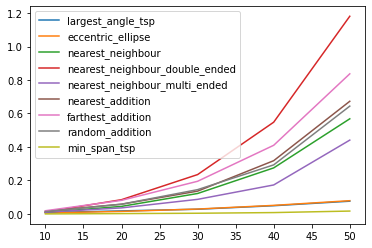

In [19]:
for i, algo in enumerate(algos):
    plot.plot(point_counts, [t[0][i] for t in times], label=algo.__name__)
plot.legend()
plot.show()

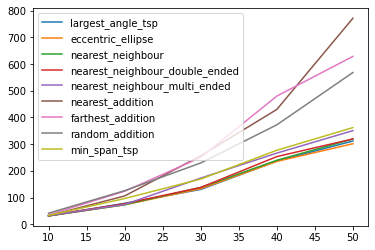

In [20]:
for i, algo in enumerate(algos):
    plot.plot(point_counts, [t[0][i] for t in costs], label=algo.__name__)
plot.legend()
plot.show()